In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
bk=pd.read_csv("bikes.csv")

In [3]:
bk.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


In [4]:
df=pd.DataFrame(data=bk)

In [5]:
df.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


In [6]:
df.shape

(191, 5)

In [7]:
df.dtypes

date            object
temperature    float64
humidity       float64
windspeed      float64
count          float64
dtype: object

In [8]:
df.describe()


,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


In [9]:
df.isnull().sum()

date           0
temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

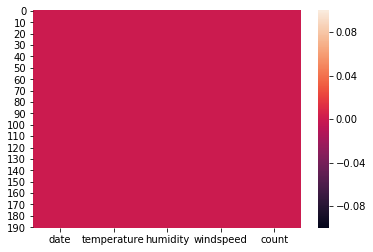

In [10]:
sns.heatmap(df.isnull())

In [11]:
list(df.columns.values)

['date', 'temperature', 'humidity', 'windspeed', 'count']

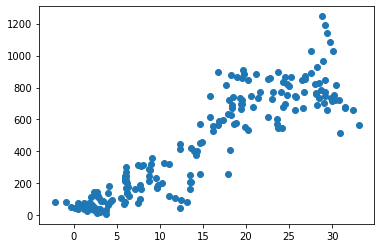

In [12]:
plt.scatter(df["temperature"],df["count"])
plt.show()

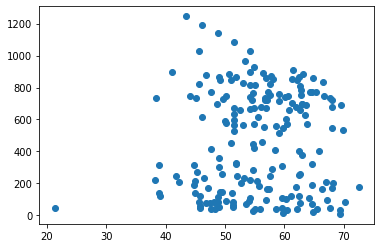

In [13]:
plt.scatter(df["humidity"],df["count"])
plt.show()

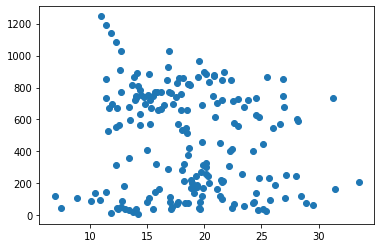

In [14]:
plt.scatter(df["windspeed"],df["count"])
plt.show()

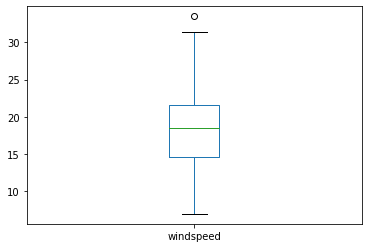

In [15]:
df["windspeed"].plot.box()

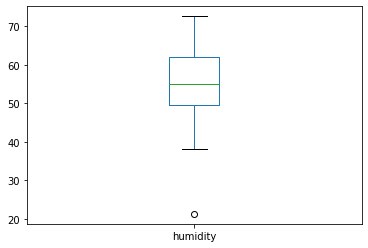

In [16]:
df["humidity"].plot.box()  

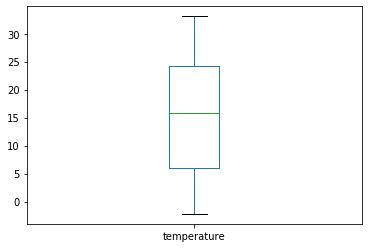

In [17]:
df["temperature"].plot.box()  

In [18]:
df_new=df.drop(["date"],axis=1)

In [19]:
df_new.shape

(191, 4)

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
z


array([[1.27938042, 1.22263292, 0.55783569, 1.06592246],
       [1.26104657, 0.15067154, 0.68875681, 1.10332582],
       [1.12512099, 1.22484456, 0.3119449 , 1.18436645],
       [1.23912261, 0.65580819, 1.69056887, 1.16566476],
       [1.27858373, 0.79274114, 0.56935655, 0.97864794],
       [1.35537645, 0.82955288, 0.3118552 , 1.08981905],
       [1.43216917, 0.86636462, 0.05435384, 1.20099016],
       [1.50896189, 0.90317636, 0.20314752, 1.31216128],
       [1.41689937, 0.52072335, 1.22930146, 1.30592738],
       [1.39856553, 0.0869118 , 1.35550871, 1.36203243],
       [1.43752746, 0.99066227, 1.30413686, 1.32151212],
       [1.45835221, 0.51887524, 1.16675442, 1.27164096],
       [1.38801575, 0.04775526, 1.09513197, 1.30670662],
       [1.31767929, 0.61438577, 1.02350952, 1.34177227],
       [1.24734283, 1.18101627, 0.95188707, 1.37683793],
       [1.17700638, 1.74764678, 0.88026462, 1.41190358],
       [0.79627659, 0.90828594, 0.00860026, 1.19683423],
       [0.95010237, 0.51532682,

In [21]:

df=df_new[(z<3).all(axis=1)]
df.shape

(190, 4)

In [22]:
df

,temperature,humidity,windspeed,count
0,2.716070,45.715346,21.414957,120.000000
1,2.896673,54.267219,15.136882,108.000000
2,4.235654,45.697702,17.034578,82.000000
3,3.112643,50.237349,10.091568,88.000000
4,2.723918,49.144928,15.738204,148.000000
5,1.967445,48.851252,17.035029,112.333333
6,1.210973,48.557576,18.331855,76.666667
7,0.454501,48.263900,19.628680,41.000000
8,1.361393,59.623460,12.414597,43.000000
9,1.541997,54.775880,25.432188,25.000000


In [23]:
x=df.iloc[:,0:3].values

In [24]:
x.shape

(190, 3)

In [25]:
x.shape

(190, 3)

In [26]:
y=df.iloc[:,3].values

In [27]:
y

array([ 120.        ,  108.        ,   82.        ,   88.        ,
        148.        ,  112.33333333,   76.66666667,   41.        ,
         43.        ,   25.        ,   38.        ,   54.        ,
         42.75      ,   31.5       ,   20.25      ,    9.        ,
         78.        ,   83.        ,   75.        ,   78.66666667,
         82.33333333,   86.        ,  186.        ,   34.        ,
         15.        ,   38.        ,   39.33333333,   40.66666667,
         42.        ,   47.        ,   72.        ,   61.        ,
         88.        ,   98.66666667,  109.33333333,  120.        ,
         64.        ,   53.        ,   47.        ,  149.        ,
        168.66666667,  188.33333333,  208.        ,  140.        ,
        218.        ,  259.        ,  579.        ,  452.75      ,
        326.5       ,  200.25      ,   74.        ,  139.        ,
        100.        ,  120.        ,  107.        ,   94.        ,
         81.        ,  137.        ,  231.        ,  123.     

In [28]:
y.shape

(190,)

In [29]:
y=y.reshape(-1,1)
y

array([[ 120.        ],
       [ 108.        ],
       [  82.        ],
       [  88.        ],
       [ 148.        ],
       [ 112.33333333],
       [  76.66666667],
       [  41.        ],
       [  43.        ],
       [  25.        ],
       [  38.        ],
       [  54.        ],
       [  42.75      ],
       [  31.5       ],
       [  20.25      ],
       [   9.        ],
       [  78.        ],
       [  83.        ],
       [  75.        ],
       [  78.66666667],
       [  82.33333333],
       [  86.        ],
       [ 186.        ],
       [  34.        ],
       [  15.        ],
       [  38.        ],
       [  39.33333333],
       [  40.66666667],
       [  42.        ],
       [  47.        ],
       [  72.        ],
       [  61.        ],
       [  88.        ],
       [  98.66666667],
       [ 109.33333333],
       [ 120.        ],
       [  64.        ],
       [  53.        ],
       [  47.        ],
       [ 149.        ],
       [ 168.66666667],
       [ 188.333

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=45)

In [32]:
x_train.shape

(133, 3)

In [33]:
x_test.shape

(57, 3)

In [34]:
y_train.shape

(133, 1)

In [35]:
y_test.shape

(57, 1)

In [36]:
lm=LinearRegression()

In [37]:
lm.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lm.score(x_train,y_train)

0.8084253301779771

In [39]:
pred=lm.predict(x_test)

In [40]:
lm.coef_

array([[28.18984028, -4.80814783, -6.27072352]])

In [41]:
lm.intercept_


array([411.63581721])

In [42]:
from sklearn.metrics import mean_squared_error
print("error:")
print(mean_squared_error(y_test,pred))

error:
16533.17796331168


In [43]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8579538191667643


In [44]:
t=np.array([[2.71,46.87,17]])


In [45]:
t

array([[ 2.71, 46.87, 17.  ]])

In [46]:
lm.predict(t)

array([[156.07009564]])

In [48]:
def linreg():
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    print(lm.score(x_train,y_train))
    print(r2_score(y_test,pred))
    print(mean_squared_error(y_test,pred))

In [49]:
linreg()

0.8084253301779771
0.8579538191667643
16533.17796331168


In [50]:
from sklearn.externals import joblib
joblib.dump(linreg,"lrsave")

['lrsave']

In [51]:
import pickle
s=pickle.dumps(linreg)
clf2=pickle.loads(s)